In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline

import seaborn as sns


In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.shape # Check number of columns and rows in data frame

(150, 5)

In [4]:
df.head() # To check first 5 rows of data set

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().values.any() # If there are any null values in data set

np.False_

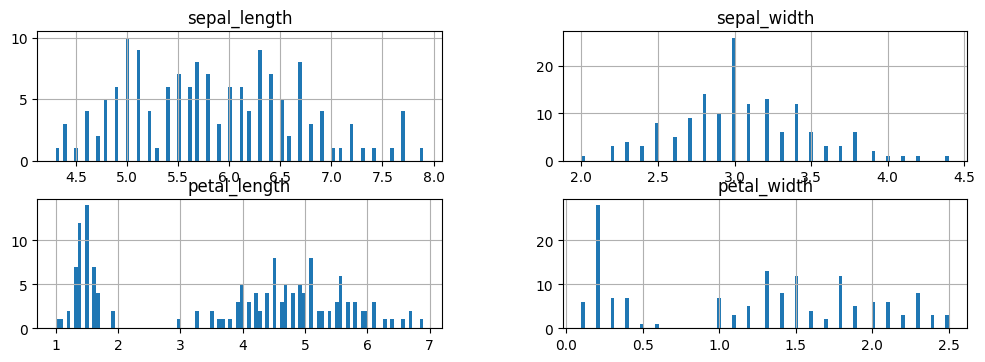

In [6]:
columns = list(df)[0:-1] # Excluding Outcome column which has only
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

In [15]:
# Exclude the non-numeric column 'species' before calculating correlation
# Assuming 'species' is the name of the non-numeric column
numeric_df = df.drop('species', axis=1)

# Now calculate the correlation matrix on the numeric data
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


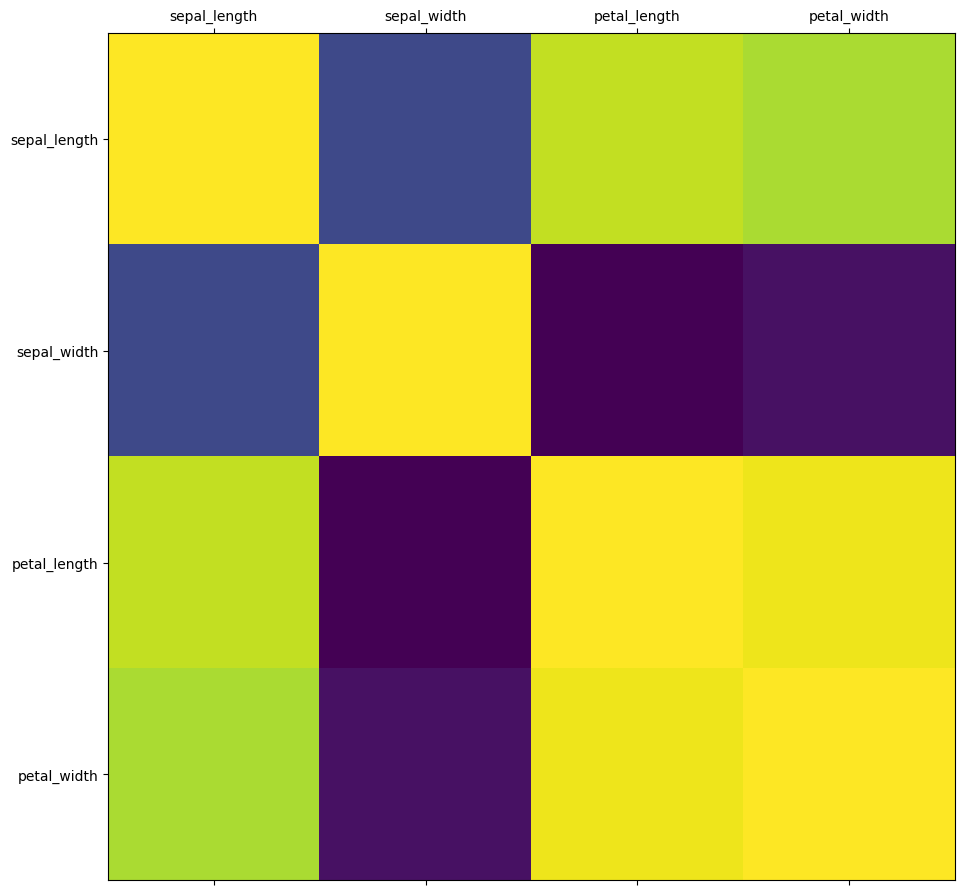

In [30]:
#  However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    # Ensure the input DataFrame is numeric before calculating correlation
    # This assumes 'species' is the non-numeric column
    numeric_df = df.select_dtypes(include=np.number)
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

# Call the function with the original DataFrame, the function will handle the numeric selection
plot_corr(df)

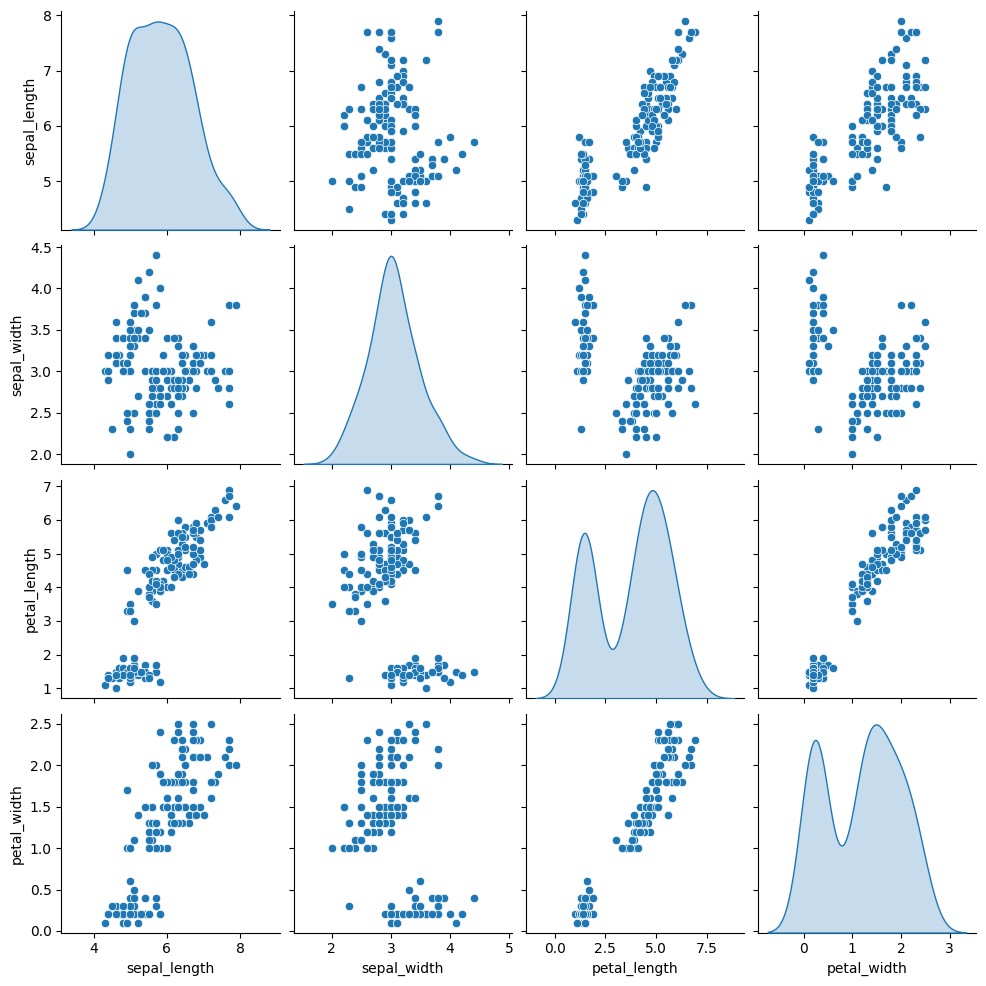

In [33]:
sns.pairplot(df,diag_kind='kde')


In [35]:
# Calculate the number of rows where 'species' is True and False
n_true = len(df.loc[df['species'] == True])
n_false = len(df.loc[df['species'] == False])

# Check if the total count is zero to avoid ZeroDivisionError
total_cases = n_true + n_false

if total_cases > 0:
    # If there are cases, calculate and print the percentages
    print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / total_cases) * 100 ))
    print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / total_cases) * 100))
else:
    # If there are no cases, print a message indicating this
    print("No cases found where 'species' is True or False.")

No cases found where 'species' is True or False.


In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('species',axis=1)     # Predictor feature columns (8 X m)

Y = df['species']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [39]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [40]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [43]:
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
import pandas as pd # Import pandas if not already imported

rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
# Convert the NumPy array output from fit_transform back to a DataFrame
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,7.7,2.6,6.9,2.3
1,5.7,3.8,1.7,0.3
2,5.0,3.6,1.4,0.2
3,4.8,3.0,1.4,0.3
4,5.2,2.7,3.9,1.4


In [44]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

<ipython-input-44-3e838a4f90e6>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model.fit(x_train, y_train.ravel())


GaussianNB()

In [45]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.9524



In [46]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.9333



Confusion Matrix


<Axes: >

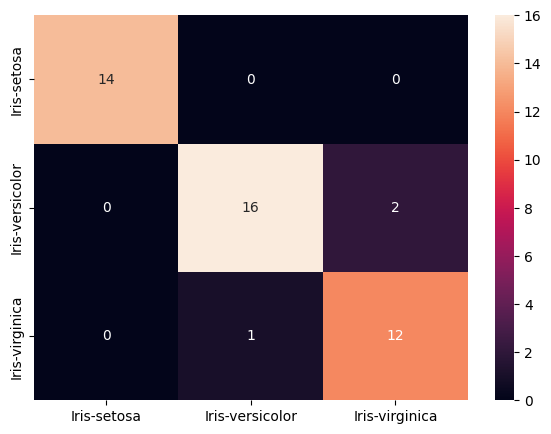

In [50]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict) # Remove the explicit labels argument

# Get the unique labels from the actual and predicted values to use for the confusion matrix display
unique_labels = sorted(list(set(y_test) | set(diab_test_predict)))


df_cm = pd.DataFrame(cm, index = unique_labels,
                  columns = unique_labels)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d') # Use fmt='d' for integer counts

In [53]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict))

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45

